In [152]:
# !pip3 install torch
# !pip install scikit-learn

In [153]:
import pandas as pd

In [154]:
# get data
data = pd.read_csv("../usa/processed-usa-data.csv", delimiter=",", names=["Temperature_Bin", "Wind_Speed_Bin", "Amount_of_Accidents"], skiprows=1)
data = data.dropna()

data

,Temperature_Bin,Wind_Speed_Bin,Amount_of_Accidents
0,Extremely Cold,No Wind,5175
1,Extremely Cold,Very Low,22582
2,Extremely Cold,Low,15178
3,Extremely Cold,Slightly Low,7546
4,Extremely Cold,Moderate Low,3503
...,...,...,...
95,Extremely Hot,Moderate High,99
96,Extremely Hot,Slightly High,19
97,Extremely Hot,High,3
98,Extremely Hot,Very High,0


In [155]:
# preprocess data
from sklearn.model_selection import train_test_split

accidents = data["Amount_of_Accidents"].values
average_accidents_per_month = accidents.sum() / (len(accidents) * 48)

print("average accidents per month: ", average_accidents_per_month)

# Perform one-hot encoding on the categorical columns
temperature_encoded = pd.get_dummies(data["Temperature_Bin"], prefix="temperature")
wind_speed_encoded = pd.get_dummies(data["Wind_Speed_Bin"], prefix="wind_speed")

# Combine the encoded features with the amount of accidents
processed_data = pd.concat([temperature_encoded, wind_speed_encoded, data["Amount_of_Accidents"]], axis=1)

# Convert the processed data to PyTorch tensors
X = processed_data.iloc[:, :-1].values
y = processed_data.iloc[:, -1].values

X_train, x_val, y_train,  y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train.shape

average accidents per month:  421.675


(80, 20)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

import numpy as np

lr = LinearRegression()
lr.fit(X_train, np.log(y_train + 1e-5))

rf = RandomForestRegressor()

rf.fit(X_train, np.log(y_train + 1e-5))

mlp = MLPRegressor(hidden_layer_sizes=(8, 8,8,8, 8, 8,), max_iter=500, activation="relu", solver="adam", learning_rate_init=1e-3, learning_rate="adaptive", random_state=42)
mlp.fit(X_train, np.log(y_train + 1e-5))

lr.score(x_val, np.log(y_val + 1e-5)),rf.score(x_val, np.log(y_val + 1e-5)), mlp.score(x_val, np.log(y_val + 1e-5))


# import joblib
# Save model with a higher protocol version
# joblib.dump(rf, "usa-model.pt", protocol=4)


/home/haukur/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.6963577292195194, 0.9629910491724658, 0.9611281909864074)

In [48]:
lr.score(x_val, np.log(y_val + 1e-5)),rf.score(x_val, np.log(y_val + 1e-5))

(0.7004125690215028, 0.5036726453554896)

In [158]:
import joblib

joblib.dump(rf, "new-usa-model.pt", protocol=4)

['new-usa-model.pt']

[[  5175  22582  15178   7546   3503   1213    414    146     88     28]
 [ 10728  38569  24186  11877   4713   1642    507    146     57     29]
 [ 19400  62352  34356  15802   6050   1915    565    133     74     72]
 [ 33567 100558  50086  21627   8282   2858    772    257    122     81]
 [ 45003 140630  69535  27068   9394   2987    830    223    163     76]
 [ 46526 162833  85158  32693  10247   3048    797    182    116     47]
 [ 43767 181655 111974  39306  10643   2594    565    173     52     35]
 [ 25962 136080 108061  41564   9824   2018    310     45     24     17]
 [  9247  56383  51595  19331   3536    534     75     29      5      7]
 [  1484   9295   8927   3273    717     99     19      3      0      0]]


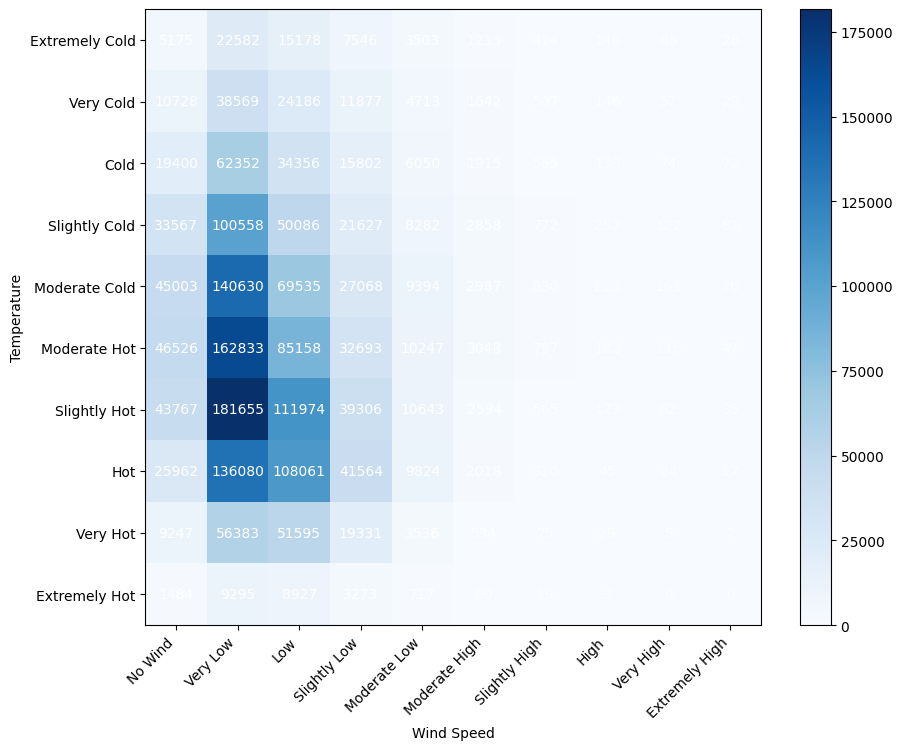

<Figure size 1280x960 with 0 Axes>

In [159]:
import numpy as np
import matplotlib.pyplot as plt

temperature_bins = [
    "Extremely Cold",
    "Very Cold",
    "Cold",
    "Slightly Cold",
    "Moderate Cold",
    "Moderate Hot",
    "Slightly Hot",
    "Hot",
    "Very Hot",
    "Extremely Hot",
]
wind_speed_bins = [
    "No Wind",
    "Very Low",
    "Low",
    "Slightly Low",
    "Moderate Low",
    "Moderate High",
    "Slightly High",
    "High",
    "Very High",
    "Extremely High",
]

graphin_data = data["Amount_of_Accidents"].values.reshape(10, 10)
print(graphin_data)
# Convert the data into a numpy array
confusion_matrix = np.array(graphin_data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the confusion matrix
im = ax.imshow(confusion_matrix, cmap='Blues')

# Set the tick labels and rotation
ax.set_xticks(np.arange(len(wind_speed_bins)))
ax.set_yticks(np.arange(len(temperature_bins)))
ax.set_xticklabels(wind_speed_bins, rotation=45, ha="right")
ax.set_yticklabels(temperature_bins)

# Loop over the data and add text annotations
for i in range(len(temperature_bins)):
    for j in range(len(wind_speed_bins)):
        # the one-hot encodings
        
        
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="w")

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title and labels
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Temperature")

# Show the plot
plt.figure(dpi=200)
plt.tight_layout()
plt.show()


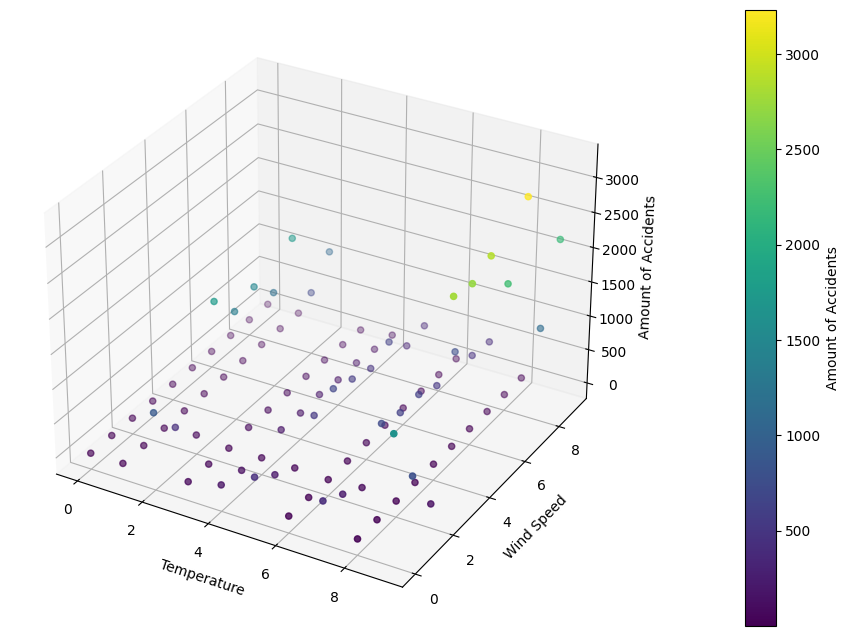

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate meshgrid for temperature and wind speed
temperature_range = np.arange(0, 10)  # Replace with the actual temperature range
wind_speed_range = np.arange(0, 10)  # Replace with the actual wind speed range

# create one-hot encoded features
temperature_one_hot = np.eye(len(temperature_range))[temperature_range]
wind_speed_one_hot = np.eye(len(wind_speed_range))[wind_speed_range]

# Flatten the one-hot encoded features
temperature_flat = temperature_one_hot.reshape(-1, len(temperature_range))
wind_speed_flat = wind_speed_one_hot.reshape(-1, len(wind_speed_range))

# all possible permutations of temperature and wind speed
all_one_hot_encodings = []
for temperature in temperature_flat:
    for wind_speed in wind_speed_flat:
        all_one_hot_encodings.append(np.concatenate([temperature, wind_speed]))

# Convert the list to a numpy array
X_pred = np.array(all_one_hot_encodings)

# Predict the amount of accidents for each combination of temperature and wind speed
y_pred = rf.predict(X_pred)
y_pred = np.exp(y_pred) - 1e-5
# scale down to 1 month
y_pred = y_pred / 48
y_pred


# Create meshgrid for temperature and wind speed
temperature_mesh, wind_speed_mesh = np.meshgrid(temperature_range, wind_speed_range)

# Reshape the meshgrid for plotting
temperature_flat = temperature_mesh.flatten()
wind_speed_flat = wind_speed_mesh.flatten()
y_pred_flat = y_pred.flatten()

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
sc = ax.scatter(temperature_flat, wind_speed_flat, y_pred_flat, c=y_pred_flat, cmap='viridis')

# Set labels and title
ax.set_xlabel('Temperature')
ax.set_ylabel('Wind Speed')
ax.set_zlabel('Amount of Accidents')

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Amount of Accidents')

# Adjust spacing between the plot and colorbar
plt.subplots_adjust(right=2.5)

plt.show()


/tmp/ipykernel_3021/4089552779.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(temperature_labels, rotation=45, ha='right')
/tmp/ipykernel_3021/4089552779.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(wind_speed_labels, rotation=45, ha='right')


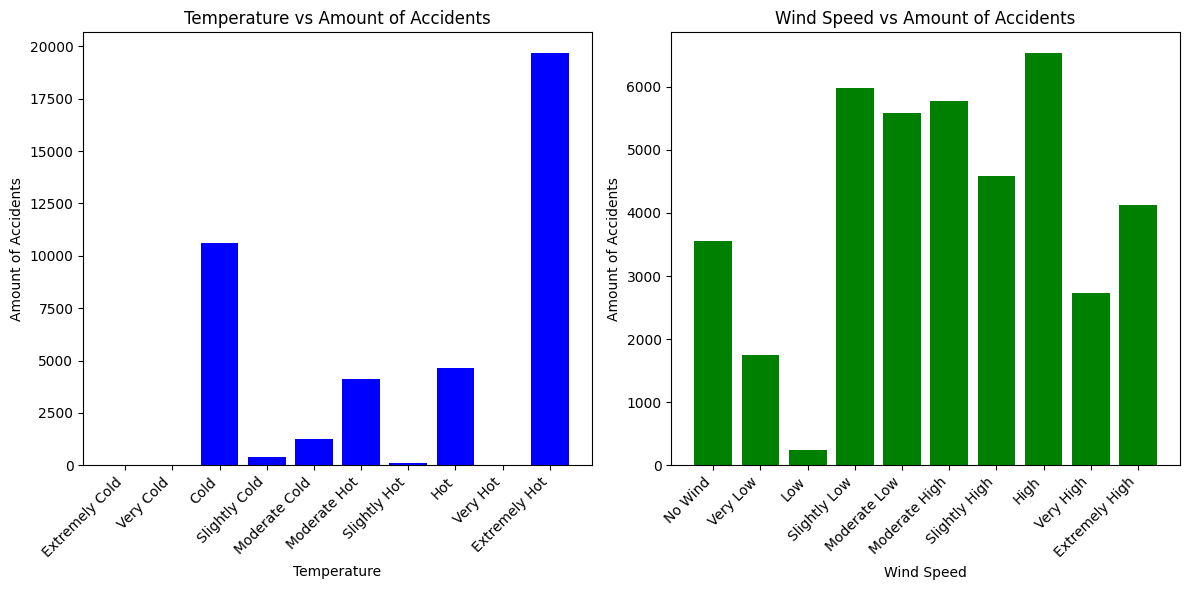

In [161]:
# view each axis separately


# Aggregate the predicted amounts of accidents for each unique temperature and wind speed combination
temperature_unique = np.unique(temperature_flat)
wind_speed_unique = np.unique(wind_speed_flat)
y_pred_aggregated = np.zeros((len(temperature_unique), len(wind_speed_unique)))

for i, temperature in enumerate(temperature_unique):
    for j, wind_speed in enumerate(wind_speed_unique):
        idx = (temperature_flat == temperature) & (wind_speed_flat == wind_speed)
        y_pred_aggregated[i, j] = np.mean(y_pred_flat[idx])


# Assign labels to each bin
temperature_labels = [
    "Extremely Cold",
    "Very Cold",
    "Cold",
    "Slightly Cold",
    "Moderate Cold",
    "Moderate Hot",
    "Slightly Hot",
    "Hot",
    "Very Hot",
    "Extremely Hot",
]
wind_speed_labels = [
    "No Wind",
    "Very Low",
    "Low",
    "Slightly Low",
    "Moderate Low",
    "Moderate High",
    "Slightly High",
    "High",
    "Very High",
    "Extremely High",
]

# Create the bar charts - Temperature vs Amount of Accidents and Wind Speed vs Amount of Accidents
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Temperature vs Amount of Accidents
ax1.bar(temperature_labels, y_pred_aggregated.sum(axis=1), color='blue')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Amount of Accidents')
ax1.set_title('Temperature vs Amount of Accidents')

# Wind Speed vs Amount of Accidents
ax2.bar(wind_speed_labels, y_pred_aggregated.sum(axis=0), color='green')
ax2.set_xlabel('Wind Speed')
ax2.set_ylabel('Amount of Accidents')
ax2.set_title('Wind Speed vs Amount of Accidents')

# Rotate x-axis labels for better visibility
ax1.set_xticklabels(temperature_labels, rotation=45, ha='right')
ax2.set_xticklabels(wind_speed_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [163]:
import torch

# Define the bins for temperature and wind speed
temperature_bins = [-float("inf"), -5, 0, 5, 10, 15, 20, 25, 30, 35, float("inf")]
wind_speed_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, float("inf")]

# Assign labels to each bin
temperature_labels = [
    "Extremely Cold",
    "Very Cold",
    "Cold",
    "Slightly Cold",
    "Moderate Cold",
    "Moderate Hot",
    "Slightly Hot",
    "Hot",
    "Very Hot",
    "Extremely Hot",
]
wind_speed_labels = [
    "No Wind",
    "Very Low",
    "Low",
    "Slightly Low",
    "Moderate Low",
    "Moderate High",
    "Slightly High",
    "High",
    "Very High",
    "Extremely High",
]

current_temperature = 15
current_wind_speed = 10

# Encode the current temperature and wind speed values into one-hot encoding
temperature_index = next((i for i, bin in enumerate(temperature_bins) if current_temperature <= bin), len(temperature_bins) - 1)
wind_speed_index = next((i for i, bin in enumerate(wind_speed_bins) if current_wind_speed <= bin))

# hacky way to solve out of index error
if wind_speed_index == len(wind_speed_bins)-1: wind_speed_index -= 1

encoded_temperature = [0] * len(temperature_labels)
encoded_temperature[temperature_index] = 1

encoded_wind_speed = [0] * len(wind_speed_labels)
encoded_wind_speed[wind_speed_index] = 1


# Combine the encoded values into a single input tensor
input_tensor = torch.tensor([encoded_temperature + encoded_wind_speed], dtype=torch.float32)

# Make the prediction using the trained model for the amount of accidents for the span of the dataset(2016-2020, or 4 years)
predicted = rf.predict(input_tensor) # in log space
predicted = np.exp(predicted) - 1e-5

# scale down to 1 month
predicted = predicted / 48

print(f"Predicted amount of accidents for the month: {predicted.item():.2f}")
deviation = (predicted.item() - average_accidents_per_month) / average_accidents_per_month * 100
print("percent deviation from average accidents per month: ", str(round(deviation, 3)) + "%")


Predicted amount of accidents for the month: 552.87
percent deviation from average accidents per month:  31.112%
